In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from skimage import io, exposure, color, transform
import pandas as pd
import math

In [2]:
path = '/D/students/jovanovskaj/remote'
imagePath = path + '/Final mTBI data/NiFTI Files'
jpgPath = path + '/T2slices'
fileList = os.listdir(jpgPath)

In [3]:
#Fix images
def tinyImage(image, size = (32,32)): 
    img = transform.resize(image, size, preserve_range=True)
    img = img.flatten()
    return img

In [4]:
#Making vectors from all images
allVectors = []
for file in fileList: #attach all slices into a list
    image = io.imread(jpgPath + '/' + file)
    allVectors.append(tinyImage(image))

allVectors = np.array(allVectors) #convert that list into a numpy array
#allVectors.shape

ValueError: Could not find a format to read the specified file in mode 'i'

In [5]:
#Choosing query
query = 'C139_T2_8.jpg'
queryImage = io.imread(jpgPath + '/' + query)
queryVector = tinyImage(queryImage)
queryVector = np.reshape(queryVector,(1,queryVector.shape[0]))
#plt.imshow(queryImage)

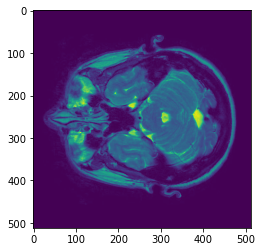

In [6]:
#Choosing query
query2 = 'C139_T2_12.jpg'
queryImage2 = io.imread(jpgPath + '/' + query2)
queryVector2 = tinyImage(queryImage2)
queryVector2 = np.reshape(queryVector2,(1,queryVector2.shape[0]))
plt.imshow(queryImage2)

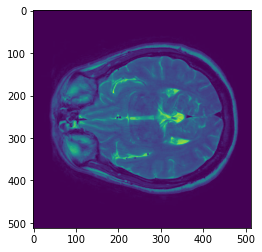

In [7]:
#Choosing query
query3 = 'C139_T2_18.jpg'
queryImage3 = io.imread(jpgPath + '/' + query3)
queryVector3 = tinyImage(queryImage3)
queryVector3 = np.reshape(queryVector3,(1,queryVector3.shape[0]))
plt.imshow(queryImage3)

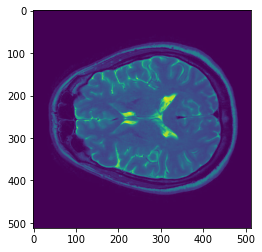

In [8]:
#Choosing query
query4 = 'C139_T2_21.jpg'
queryImage4 = io.imread(jpgPath + '/' + query4)
queryVector4 = tinyImage(queryImage4)
queryVector4 = np.reshape(queryVector4,(1,queryVector4.shape[0]))
plt.imshow(queryImage4)

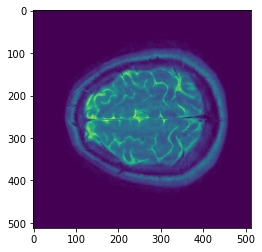

In [9]:
#Choosing query
query5 = 'C139_T2_30.jpg'
queryImage5 = io.imread(jpgPath + '/' + query5)
queryVector5 = tinyImage(queryImage5)
queryVector5 = np.reshape(queryVector5,(1,queryVector5.shape[0]))
plt.imshow(queryImage5)

In [10]:
df1 = pd.read_excel("/D/students/jovanovskaj/remote/Final mTBI data/Clinical Data mTBI/mTBI Clinical Info.xlsx")

patients = df1['Study ID']
patients = patients.values.tolist()

memoryLossY = [np.nan if x == 6.0 else x for x in df1[8]]
memoryLossY = [1.0 if x >= 1.0 else x for x in memoryLossY]

# conversion of lists to dictionary
# using dictionary comprehension
id_mem_dict = {patients[i]: memoryLossY[i] for i in range(len(patients))}

In [11]:
#---Query
from scipy.spatial import distance
import cv2

dists = distance.cdist(queryVector, allVectors,metric='euclidean') #vector of distances
idx = np.argsort(dists) #sort distances

#--- for printing images; grid layout 
#count = 0
#cols = 10
#rows = 10
#fig = plt.figure(figsize=(16,16))

#--- just for testing
#print(idx[0])
#print(fileList[idx[0][8]])

#--- for resizing images to standardize; some are 512x512, some are 416x416
height = 128
width = 128

list_of_done_files=[]

images1 = [] #slice 8
mem_labels1 = []


for fileNum in idx[0]:
    file = fileList[fileNum]
    if query.split('_')[0] == file.split('_')[0]:
        continue
    if file.split('_')[0] in list_of_done_files:
        continue
    else:
        list_of_done_files.append(file.split('_')[0])
    
    #count += 1
    #plt.subplot(rows, cols, count)
    #plt.imshow(io.imread(jpgPath + '/' + file))
    #plt.title(file)
    #plt.xticks([])
    #plt.yticks([])
    #if count == rows*cols:
    #    break
 
    #--- converting the image to a list, resize it, and add it to images
    image = cv2.imread(jpgPath + '/' + file,cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (width, height)).reshape(width,height,1)
    images1.append(image)
    
    #--- finding memory loss rating and storing in mem_labels 
    # use file to get patient ID; NOTE: file is a string like "C003_T2_8.jpg" and study ID is "C003"
    # use file.split("_")[0] <--the first part of file
    # get the corresponding memory label and append to mem_labels1
    
    #if k in list_of_done_files:
    #    if k in id_mem_dict:
    #       mem_labels1.append(id_mem_dict.values()) 
    #   else:
    #      mem_labels1.append(np.nan)

        
for id_code in list_of_done_files:
    if id_code in id_mem_dict.keys():
        #print(id_code)
        mem_labels1.append(id_mem_dict[id_code])
    else:
        mem_labels1.append(np.nan) 
    
#images1 = np.array(images1, dtype=object)
#mem_labels1 = np.array(mem_labels1)


X_images1 = []
Y_labels1 = []

for index in range(len(mem_labels1)):
    if not math.isnan(mem_labels1[index]):
        X_images1.append(images1[index])
        Y_labels1.append(mem_labels1[index])

#for index in range(len(mem_labels1)):
#    if mem_labels1[index] != np.nan:
#        X_images1.append(images1[index])
#        Y_labels1.append(mem_labels1[index])

        
X_images1 = np.array(X_images1)
Y_labels1 = np.array(Y_labels1)

#X_images1 = np.nan_to_num(X_images1)
#Y_labels1 = np.nan_to_num(Y_labels1)

#--- test for length
#print(len(Y_labels1)==len(X_images1))

#--- test
#images1[123].shape
    
# Note: You do not need to do the test/train split done over the summer. 
# You can do it automatically using sklearn where 20% is for testing

#TO DO: Make the labels array based on memory

In [12]:
#---Query2
from scipy.spatial import distance
import cv2

dists = distance.cdist(queryVector2, allVectors,metric='euclidean') #vector of distances
idx = np.argsort(dists) #sort distances

#--- for resizing images to standardize; some are 512x512, some are 416x416
height = 128
width = 128

list_of_done_files=[]

images2 = [] #slice 12
mem_labels2 = []

for fileNum in idx[0]:
    file = fileList[fileNum]
    if query2.split('_')[0] == file.split('_')[0]:
        continue
    if file.split('_')[0] in list_of_done_files:
        continue
    else:
        list_of_done_files.append(file.split('_')[0])
    
    #--- converting the image to a list, resize it, and add it to images
    image = cv2.imread(jpgPath + '/' + file,cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (width, height)).reshape(width,height,1)
    images2.append(image)
       
for id_code in list_of_done_files:
    if id_code in id_mem_dict.keys():
        #print(id_code)
        mem_labels2.append(id_mem_dict[id_code])
    else:
        mem_labels2.append(np.nan) 
    
X_images2 = []
Y_labels2 = []

for index in range(len(mem_labels2)):
    if not math.isnan(mem_labels2[index]):
        X_images2.append(images2[index])
        Y_labels2.append(mem_labels2[index])
        
X_images2 = np.array(X_images2)
Y_labels2 = np.array(Y_labels2)

In [13]:
#---Query3
from scipy.spatial import distance
import cv2

dists = distance.cdist(queryVector3, allVectors,metric='euclidean') #vector of distances
idx = np.argsort(dists) #sort distances

height = 128
width = 128

list_of_done_files=[]

images3 = [] #slice 18
mem_labels3 = []

for fileNum in idx[0]:
    file = fileList[fileNum]
    if query3.split('_')[0] == file.split('_')[0]:
        continue
    if file.split('_')[0] in list_of_done_files:
        continue
    else:
        list_of_done_files.append(file.split('_')[0])
    
    #--- converting the image to a list, resize it, and add it to images
    image = cv2.imread(jpgPath + '/' + file,cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (width, height)).reshape(width,height,1)
    images3.append(image)
    
for id_code in list_of_done_files:
    if id_code in id_mem_dict.keys():
        #print(id_code)
        mem_labels3.append(id_mem_dict[id_code])
    else:
        mem_labels3.append(np.nan) 

X_images3 = []
Y_labels3 = []

for index in range(len(mem_labels3)):
    if not math.isnan(mem_labels3[index]):
        X_images3.append(images3[index])
        Y_labels3.append(mem_labels3[index])

        
X_images3 = np.array(X_images3)
Y_labels3 = np.array(Y_labels3)

In [14]:
#---Query4
from scipy.spatial import distance
import cv2

dists = distance.cdist(queryVector4, allVectors,metric='euclidean') #vector of distances
idx = np.argsort(dists) #sort distances

height = 128
width = 128

list_of_done_files=[]

images4 = [] #slice 21
mem_labels4 = []

for fileNum in idx[0]:
    file = fileList[fileNum]
    if query4.split('_')[0] == file.split('_')[0]:
        continue
    if file.split('_')[0] in list_of_done_files:
        continue
    else:
        list_of_done_files.append(file.split('_')[0])
    
    #--- converting the image to a list, resize it, and add it to images
    image = cv2.imread(jpgPath + '/' + file,cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (width, height)).reshape(width,height,1)
    images4.append(image)
    
for id_code in list_of_done_files:
    if id_code in id_mem_dict.keys():
        #print(id_code)
        mem_labels4.append(id_mem_dict[id_code])
    else:
        mem_labels4.append(np.nan) 

X_images4 = []
Y_labels4 = []

for index in range(len(mem_labels4)):
    if not math.isnan(mem_labels4[index]):
        X_images4.append(images4[index])
        Y_labels4.append(mem_labels4[index])

X_images4 = np.array(X_images4)
Y_labels4 = np.array(Y_labels4)


In [15]:
#---Query5
from scipy.spatial import distance
import cv2

dists = distance.cdist(queryVector5, allVectors,metric='euclidean') #vector of distances
idx = np.argsort(dists) #sort distances

height = 128
width = 128

list_of_done_files=[]

images5 = [] #slice 30
mem_labels5 = []

for fileNum in idx[0]:
    file = fileList[fileNum]
    if query5.split('_')[0] == file.split('_')[0]:
        continue
    if file.split('_')[0] in list_of_done_files:
        continue
    else:
        list_of_done_files.append(file.split('_')[0])
    
    #--- converting the image to a list, resize it, and add it to images
    image = cv2.imread(jpgPath + '/' + file,cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (width, height)).reshape(width,height,1)
    images5.append(image)
    
for id_code in list_of_done_files:
    if id_code in id_mem_dict.keys():
        #print(id_code)
        mem_labels5.append(id_mem_dict[id_code])
    else:
        mem_labels5.append(np.nan) 

X_images5 = []
Y_labels5 = []

for index in range(len(mem_labels5)):
    if not math.isnan(mem_labels5[index]):
        X_images5.append(images5[index])
        Y_labels5.append(mem_labels5[index])
        
X_images5 = np.array(X_images5)
Y_labels5 = np.array(Y_labels5)


In [71]:
# repeat for each of the slice references 

# automatically split your imagesX and mem_labelsX into 80% training and 20% testing using sklearn test_train_split

# copy the models from the old code from last summer

from sklearn.model_selection import train_test_split


#---Query
X_train, X_test, y_train, y_test = train_test_split(X_images1, Y_labels1, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

#---Query2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_images2, Y_labels2, test_size=0.2, random_state=42)
print(X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape)

#---Query3
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_images3, Y_labels3, test_size=0.2, random_state=42)
print(X_train3.shape, y_train3.shape, X_test3.shape, y_test3.shape)

#---Query4
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_images4, Y_labels4,  test_size=0.2, random_state=42)
print(X_train4.shape, y_train4.shape, X_test4.shape, y_test4.shape)

#---Query5
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_images5, Y_labels5, test_size=0.2, random_state=42)
print(X_train5.shape, y_train5.shape, X_test5.shape, y_test5.shape)

(107, 128, 128, 1) (107,) (27, 128, 128, 1) (27,)
(107, 128, 128, 1) (107,) (27, 128, 128, 1) (27,)
(107, 128, 128, 1) (107,) (27, 128, 128, 1) (27,)
(107, 128, 128, 1) (107,) (27, 128, 128, 1) (27,)
(107, 128, 128, 1) (107,) (27, 128, 128, 1) (27,)


In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import Input


model1 = Sequential(
    [
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2],1)),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(16, activation='relu'),
        BatchNormalization(axis=-1),
        Dropout(0.5),
        Dense(4,activation='relu'),
        Dense(1, activation='linear')
    ]
)

model2 = Sequential(
    [
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(X_train2.shape[1], X_train2.shape[2],1)),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(16, activation='relu'),
        BatchNormalization(axis=-1),
        Dropout(0.5),
        Dense(4,activation='relu'),
        Dense(1, activation='linear')
    ]
)


model3 = Sequential(
    [
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(X_train3.shape[1], X_train3.shape[2],1)),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(16, activation='relu'),
        BatchNormalization(axis=-1),
        Dropout(0.5),
        Dense(4,activation='relu'),
        Dense(1, activation='linear')
    ]
)

model4 = Sequential(
    [
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(X_train4.shape[1], X_train4.shape[2],1)),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(16, activation='relu'),
        BatchNormalization(axis=-1),
        Dropout(0.5),
        Dense(4,activation='relu'),
        Dense(1, activation='linear')
    ]
)

model5 = Sequential(
    [
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(X_train5.shape[1], X_train5.shape[2],1)),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(axis=-1),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(16, activation='relu'),
        BatchNormalization(axis=-1),
        Dropout(0.5),
        Dense(4,activation='relu'),
        Dense(1, activation='linear')
    ]
)

model1.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 126, 126, 16)      160       
_________________________________________________________________
batch_normalization_60 (Batc (None, 126, 126, 16)      64        
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
batch_normalization_61 (Batc (None, 61, 61, 32)        128       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 64)      

In [73]:
# opt = Adam(lr=1e-3, decay=1e-3 / 200)
# optimizer = tf.keras.optimizers.Adam(lr=1e-2, decay=1e-3 / 200)

# starter_learning_rate = 1e-2
# end_learning_rate = 1e-4
# decay_steps = 25
# learning_rate_fn = tf.keras.optimizers.schedules.PolynomialDecay(
#     starter_learning_rate,
#     decay_steps,
#     end_learning_rate,
#     power=0.5)


def scheduler(epoch, lr):
    if epoch%10==0:
        return lr*tf.math.exp(-0.1)
    else:
        return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)

optimizer1 = tf.keras.optimizers.Adam(lr=1e-2)
optimizer2 = tf.keras.optimizers.Adam(lr=1e-2)
optimizer3 = tf.keras.optimizers.Adam(lr=1e-2)
optimizer4 = tf.keras.optimizers.Adam(lr=1e-2)
optimizer5 = tf.keras.optimizers.Adam(lr=1e-2)


model1.compile(optimizer=optimizer1,
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=['mse', 'mae', 'accuracy'])
model2.compile(optimizer=optimizer2,
               loss = tf.keras.losses.MeanAbsoluteError(),
               metrics=['mse', 'mae', 'accuracy'])
model3.compile(optimizer=optimizer3,
               loss = tf.keras.losses.MeanAbsoluteError(),
               metrics=['mse', 'mae', 'accuracy'])
model4.compile(optimizer=optimizer4,
               loss = tf.keras.losses.MeanAbsoluteError(),
               metrics=['mse', 'mae', 'accuracy'])
model5.compile(optimizer=optimizer5,
               loss = tf.keras.losses.MeanAbsoluteError(),
               metrics=['mse', 'mae', 'accuracy'])

#print(X_train[:,:,:,0][:,:,:, np.newaxis].shape)


/usr/local/lib/python3.9/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [74]:
BATCH_SIZE = 20
EPOCHS = 100

# train the model
history1=model1.fit(X_train[:,:,:,0][:,:,:, np.newaxis], y_train, validation_data=(X_test[:,:,:,0][:,:,:, np.newaxis], y_test), \
                   epochs=EPOCHS, batch_size=BATCH_SIZE,shuffle=True,callbacks=[lr_schedule]) # add callbacks=[lr_schedule]

Epoch 1/100
6/6 [==============================] - 1s 41ms/step - loss: 0.8227 - mse: 1.2062 - mae: 0.8227 - accuracy: 0.5047 - val_loss: 56.8451 - val_mse: 3345.6099 - val_mae: 56.8451 - val_accuracy: 0.5556
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 0.5579 - mse: 0.4744 - mae: 0.5579 - accuracy: 0.5607 - val_loss: 27.1292 - val_mse: 1553.0912 - val_mae: 27.1292 - val_accuracy: 0.4444
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 0.5884 - mse: 0.5045 - mae: 0.5884 - accuracy: 0.4766 - val_loss: 67.8451 - val_mse: 5944.7314 - val_mae: 67.8451 - val_accuracy: 0.5926
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 0.5255 - mse: 0.3921 - mae: 0.5255 - accuracy: 0.4860 - val_loss: 66.2620 - val_mse: 5501.3862 - val_mae: 66.2620 - val_accuracy: 0.5556
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 0.5147 - mse: 0.3715 - mae: 0.5147 - accuracy: 0.5047 - val_loss: 58.8155 - val_mse: 4346.24

In [75]:
#--- test
#print(X_train[:,:,:,0][:,:,:, np.newaxis].shape)

In [76]:
#--- Query 2
history2=model2.fit(X_train2[:,:,:,0][:,:,:, np.newaxis], y_train2, validation_data=(X_test2[:,:,:,0][:,:,:, np.newaxis], y_test2), \
                   epochs=EPOCHS, batch_size=BATCH_SIZE,shuffle=True,callbacks=[lr_schedule]) # add callbacks=[lr_schedule]

Epoch 1/100
6/6 [==============================] - 1s 51ms/step - loss: 0.9440 - mse: 1.3746 - mae: 0.9440 - accuracy: 0.4206 - val_loss: 56.8376 - val_mse: 3331.8062 - val_mae: 56.8376 - val_accuracy: 0.5556
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 0.6629 - mse: 0.5982 - mae: 0.6629 - accuracy: 0.3832 - val_loss: 49.7232 - val_mse: 2523.9846 - val_mae: 49.7232 - val_accuracy: 0.4444
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 0.5857 - mse: 0.4750 - mae: 0.5857 - accuracy: 0.4673 - val_loss: 29.9900 - val_mse: 909.5148 - val_mae: 29.9900 - val_accuracy: 0.4444
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 0.5279 - mse: 0.3843 - mae: 0.5279 - accuracy: 0.5140 - val_loss: 8.2437 - val_mse: 70.3385 - val_mae: 8.2437 - val_accuracy: 0.5556
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 0.4913 - mse: 0.3253 - mae: 0.4913 - accuracy: 0.5234 - val_loss: 9.8289 - val_mse: 102.7186 - va

In [77]:
#---Query3
history3=model3.fit(X_train3[:,:,:,0][:,:,:, np.newaxis], y_train3, validation_data=(X_test3[:,:,:,0][:,:,:, np.newaxis], y_test3), \
                   epochs=EPOCHS, batch_size=BATCH_SIZE,shuffle=True,callbacks=[lr_schedule]) 

Epoch 1/100
6/6 [==============================] - 1s 41ms/step - loss: 1.0326 - mse: 2.3499 - mae: 1.0326 - accuracy: 0.5234 - val_loss: 30.6596 - val_mse: 1108.1686 - val_mae: 30.6596 - val_accuracy: 0.4815
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 0.7298 - mse: 0.9280 - mae: 0.7298 - accuracy: 0.4766 - val_loss: 2.0065 - val_mse: 9.2086 - val_mae: 2.0065 - val_accuracy: 0.5926
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 0.5759 - mse: 0.5233 - mae: 0.5759 - accuracy: 0.5234 - val_loss: 0.4815 - val_mse: 0.4814 - val_mae: 0.4815 - val_accuracy: 0.5185
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 0.5244 - mse: 0.4135 - mae: 0.5244 - accuracy: 0.4766 - val_loss: 0.4825 - val_mse: 0.4553 - val_mae: 0.4825 - val_accuracy: 0.5185
Epoch 5/100
6/6 [==============================] - 0s 18ms/step - loss: 0.5443 - mse: 0.4510 - mae: 0.5443 - accuracy: 0.5234 - val_loss: 0.4835 - val_mse: 0.4320 - val_mae: 0.483

In [78]:
#---Query4
history4=model4.fit(X_train4[:,:,:,0][:,:,:, np.newaxis], y_train4, validation_data=(X_test4[:,:,:,0][:,:,:, np.newaxis], y_test4), \
                   epochs=EPOCHS, batch_size=BATCH_SIZE,shuffle=True,callbacks=[lr_schedule]) 

Epoch 1/100
6/6 [==============================] - 1s 42ms/step - loss: 1.4941 - mse: 3.6862 - mae: 1.4941 - accuracy: 0.4579 - val_loss: 104.5629 - val_mse: 12575.3730 - val_mae: 104.5629 - val_accuracy: 0.4815
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 0.9863 - mse: 2.1647 - mae: 0.9863 - accuracy: 0.4860 - val_loss: 23.2511 - val_mse: 841.4097 - val_mae: 23.2511 - val_accuracy: 0.4815
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 0.7017 - mse: 0.8462 - mae: 0.7017 - accuracy: 0.5140 - val_loss: 5.0021 - val_mse: 45.6876 - val_mae: 5.0021 - val_accuracy: 0.4815
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 0.6502 - mse: 0.7024 - mae: 0.6502 - accuracy: 0.5140 - val_loss: 1.4233 - val_mse: 3.7347 - val_mae: 1.4233 - val_accuracy: 0.4815
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 0.6138 - mse: 0.5505 - mae: 0.6138 - accuracy: 0.5047 - val_loss: 0.7844 - val_mse: 0.9597 - val_ma

In [79]:
#---Query5
history5=model5.fit(X_train5[:,:,:,0][:,:,:, np.newaxis], y_train5, validation_data=(X_test5[:,:,:,0][:,:,:, np.newaxis], y_test5), \
                   epochs=EPOCHS, batch_size=BATCH_SIZE,shuffle=True,callbacks=[lr_schedule]) 

Epoch 1/100
6/6 [==============================] - 1s 43ms/step - loss: 1.2096 - mse: 2.2872 - mae: 1.2096 - accuracy: 0.4486 - val_loss: 428.0465 - val_mse: 195849.7344 - val_mae: 428.0465 - val_accuracy: 0.3704
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 0.6785 - mse: 0.8267 - mae: 0.6785 - accuracy: 0.4579 - val_loss: 238.0771 - val_mse: 60455.4062 - val_mae: 238.0771 - val_accuracy: 0.3704
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 0.6066 - mse: 0.9906 - mae: 0.6066 - accuracy: 0.4766 - val_loss: 130.2155 - val_mse: 18246.2871 - val_mae: 130.2155 - val_accuracy: 0.3704
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 0.5579 - mse: 0.6338 - mae: 0.5579 - accuracy: 0.5234 - val_loss: 40.9684 - val_mse: 1972.8961 - val_mae: 40.9684 - val_accuracy: 0.3704
Epoch 5/100
6/6 [==============================] - 0s 18ms/step - loss: 0.4896 - mse: 0.3421 - mae: 0.4896 - accuracy: 0.5514 - val_loss: 5.0545 - val_mse

In [54]:
model1.save_weights('model1.h5')

In [18]:
history2=model2.fit(X_train[:,:,:,1][:,:,:, np.newaxis], y_train, validation_data=(X_test[:,:,:,1][:,:,:, np.newaxis], y_test), \
                    epochs=EPOCHS, batch_size=BATCH_SIZE,shuffle=True,callbacks=[lr_schedule])

IndexError: index 1 is out of bounds for axis 3 with size 1

In [21]:
history3 =model3.fit(X_train[:,:,:,2][:,:,:, np.newaxis], y_train, validation_data=(X_test[:,:,:,2][:,:,:, np.newaxis], y_test), \
                    epochs=EPOCHS, batch_size=BATCH_SIZE,shuffle=True,callbacks=[lr_schedule])

IndexError: index 2 is out of bounds for axis 3 with size 1

In [22]:
history4=model4.fit(X_train[:,:,:,3][:,:,:, np.newaxis], y_train, validation_data=(X_test[:,:,:,3][:,:,:, np.newaxis], y_test), \
                    epochs=EPOCHS, batch_size=BATCH_SIZE,shuffle=True,callbacks=[lr_schedule])

IndexError: index 3 is out of bounds for axis 3 with size 1

In [20]:
preds1 = model1.predict(X_test[:,:,:,0][:,:,:, np.newaxis])
predsQ2 = model1.predict(X_test2[:,:,:,0][:,:,:, np.newaxis])
predsQ3 = model1.predict(X_test3[:,:,:,0][:,:,:, np.newaxis])
predsQ4 = model1.predict(X_test4[:,:,:,0][:,:,:, np.newaxis])
predsQ5 = model1.predict(X_test5[:,:,:,0][:,:,:, np.newaxis])

#preds2a = model2.predict(X_test[:,:,:,1][:,:,:, np.newaxis])
#preds3a = model3.predict(X_test[:,:,:,2][:,:,:, np.newaxis])
#preds4a = model4.predict(X_test[:,:,:,3][:,:,:, np.newaxis])
print(preds1.shape)


(39, 1)


In [21]:
preds1 = model1.predict(X_images1[:,:,:,0][:,:,:, np.newaxis])
print(preds1.shape)

(195, 1)


In [80]:
print(model1.evaluate(X_test, y_test))

1/1 [==============================] - 0s 32ms/step - loss: 0.4505 - mse: 0.3701 - mae: 0.4505 - accuracy: 0.5556
[0.4504949152469635, 0.3700670897960663, 0.4504949152469635, 0.5555555820465088]


In [81]:
print(model2.evaluate(X_test2, y_test2))

1/1 [==============================] - 0s 30ms/step - loss: 0.4596 - mse: 0.4193 - mae: 0.4596 - accuracy: 0.5556
[0.4596249759197235, 0.4193202257156372, 0.4596249759197235, 0.5555555820465088]


In [82]:
print(model3.evaluate(X_test3, y_test3))

1/1 [==============================] - 0s 30ms/step - loss: 0.4322 - mse: 0.3532 - mae: 0.4322 - accuracy: 0.5185
[0.4322381317615509, 0.35323652625083923, 0.4322381317615509, 0.5185185074806213]


In [83]:
print(model4.evaluate(X_test4, y_test4))

1/1 [==============================] - 0s 30ms/step - loss: 0.5076 - mse: 0.4238 - mae: 0.5076 - accuracy: 0.5185
[0.5075927972793579, 0.42379724979400635, 0.5075927972793579, 0.5185185074806213]


In [84]:
print(model5.evaluate(X_test5, y_test5))

1/1 [==============================] - 0s 28ms/step - loss: 0.4682 - mse: 0.3178 - mae: 0.4682 - accuracy: 0.5185
[0.4681827425956726, 0.31781572103500366, 0.4681827425956726, 0.5185185074806213]


In [85]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_test, y_test)
reg.score(X_test, y_test)


ValueError: Found array with dim 4. Estimator expected <= 2.